In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [286]:
df = pd.read_csv("premier-league-matches.csv")
df.head()

#creating season-wise database for simplicity
seasons = df['Season_End_Year'].unique()
season_data = {}

# Iterate through each season and create a DataFrame for each
for season_number, season_end_year in enumerate(seasons, start=1):
    season_df = df[df['Season_End_Year'] == season_end_year][['Date','Home', 'HomeGoals', 'AwayGoals', 'Away', 'FTR']]
    season_data[season_number] = season_df

# Access season-wise DataFrames using the season number as key
for season_number, season_df in season_data.items():
    print(f"Season {season_number}:")
    print(season_df)
    print("\n")

    

Season 1:
           Date            Home  HomeGoals  AwayGoals            Away FTR
0    1992-08-15   Coventry City          2          1   Middlesbrough   H
1    1992-08-15    Leeds United          2          1       Wimbledon   H
2    1992-08-15   Sheffield Utd          2          1  Manchester Utd   H
3    1992-08-15  Crystal Palace          3          3       Blackburn   D
4    1992-08-15         Arsenal          2          4    Norwich City   A
..          ...             ...        ...        ...             ...  ..
457  1993-05-08   Coventry City          3          3    Leeds United   D
458  1993-05-09       Wimbledon          1          2  Manchester Utd   A
459  1993-05-09             QPR          2          1     Aston Villa   H
460  1993-05-11         Arsenal          1          3       Tottenham   A
461  1993-05-11             QPR          3          1  Sheffield Weds   H

[462 rows x 6 columns]


Season 2:
           Date             Home  HomeGoals  AwayGoals            

In [287]:
team_rating = {}
#setup initial elo rating for all the team playing in 1993 premier league
for i in df['Home'].unique():
    team_rating[i] = {"rating": 1500, "played": False}

print(team_rating)


{'Coventry City': {'rating': 1500, 'played': False, 'wins': 0, 'losses': 0, 'draws': 0}, 'Leeds United': {'rating': 1500, 'played': False, 'wins': 0, 'losses': 0, 'draws': 0}, 'Sheffield Utd': {'rating': 1500, 'played': False, 'wins': 0, 'losses': 0, 'draws': 0}, 'Crystal Palace': {'rating': 1500, 'played': False, 'wins': 0, 'losses': 0, 'draws': 0}, 'Arsenal': {'rating': 1500, 'played': False, 'wins': 0, 'losses': 0, 'draws': 0}, 'Ipswich Town': {'rating': 1500, 'played': False, 'wins': 0, 'losses': 0, 'draws': 0}, 'Everton': {'rating': 1500, 'played': False, 'wins': 0, 'losses': 0, 'draws': 0}, 'Southampton': {'rating': 1500, 'played': False, 'wins': 0, 'losses': 0, 'draws': 0}, 'Chelsea': {'rating': 1500, 'played': False, 'wins': 0, 'losses': 0, 'draws': 0}, "Nott'ham Forest": {'rating': 1500, 'played': False, 'wins': 0, 'losses': 0, 'draws': 0}, 'Manchester City': {'rating': 1500, 'played': False, 'wins': 0, 'losses': 0, 'draws': 0}, 'Blackburn': {'rating': 1500, 'played': False, '

In [288]:
# Function to update Elo ratings for home and away teams based on match result
def update_elo(home_team, away_team, ftr, k=32):
    home_elo = team_rating[home_team]["rating"] # Get current Elo rating for home team
    away_elo = team_rating[away_team]["rating"] # Get current Elo rating for away team

    # Calculate expected probabilities of home team winning and away team winning
    expected_home = 1 / (1 + 10**((away_elo - home_elo) / 400))
    expected_away = 1 / (1 + 10**((home_elo - away_elo) / 400))

    # Update Elo ratings based on match result
    if ftr == 'H': # Home team wins
        home_elo_new = home_elo + k*(1 - expected_home)
        away_elo_new = away_elo + k*(-expected_away)
    elif ftr == 'D': # Draw
        home_elo_new = home_elo + k*(0.5 - expected_home)
        away_elo_new = away_elo + k*(0.5 - expected_away)
    else: # Away team wins
        home_elo_new = home_elo + k*(-expected_home)
        away_elo_new = away_elo + k*(1 - expected_away)

    # Update Elo ratings and set "played" flag to True for both teams
    team_rating[home_team]["rating"] = round(home_elo_new)
    team_rating[away_team]["rating"] = round(away_elo_new)
    team_rating[home_team]["played"] = True
    team_rating[away_team]["played"] = True


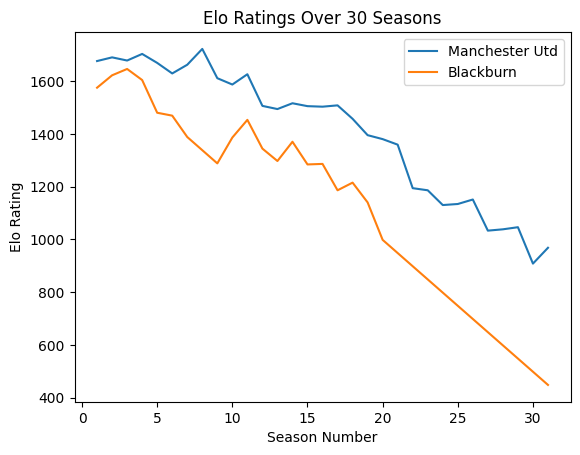

In [289]:
# Plotting Elo rating over a season for Manchester united vs Arsenal 
team1 = 'Manchester Utd'
team_data1= [] # elo rating at end of each season

team2 = 'Blackburn'
team_data2 = []

# Open a CSV file for writing
with open("training_dataset.csv",mode="w",newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Date', 'Home Team', 'Away Team', 'Home Team Rating', 'Away Team Rating', 'Home Goals', 'Away Goals', 'Winner'])
    
    season_count = [i for i in range(1,32)]
    
    # Iterate through each season and each match in the season
    for season_num, season_df in season_data.items():
        for i in season_df.index:
            date = season_df.at[i, "Date"]
            home_team = season_df.at[i, "Home"]
            away_team = season_df.at[i, "Away"]
            home_goals = season_df.at[i, "HomeGoals"]
            away_goals = season_df.at[i, "AwayGoals"]
            ftr = season_df.at[i, "FTR"]
            
            # Update Elo ratings based on match result
            update_elo(home_team, away_team, ftr)
            
            # Write match details to the CSV file
            if (ftr == 'H'):
                csv_writer.writerow([date, home_team, away_team, team_rating[home_team]["rating"], team_rating[away_team]["rating"],home_goals,away_goals, 1])
            elif (ftr == 'A'):
                csv_writer.writerow([date, home_team, away_team, team_rating[home_team]["rating"], team_rating[away_team]["rating"],home_goals,away_goals, -1])
            else:
                csv_writer.writerow([date, home_team, away_team, team_rating[home_team]["rating"], team_rating[away_team]["rating"],home_goals,away_goals, 0])
        
        # Sort the team ratings in descending order
        team_rating = dict(sorted(team_rating.items(), key=lambda x: x[1]["rating"], reverse=True))
        
        # Write the season standings to a text file
        file2 = open(f"Season Fixtures/season{season_num}.txt","w")
        file2.write(f"Season {season_num} Standings: \n")
        for team in team_rating:
            if (team_rating[team]["played"] == False and team_rating[team]["rating"] > 100):
                team_rating[team]["rating"] = team_rating[team]["rating"] - 50
            else:
                team_rating[team]["played"] = False
                team_rating[team]["rating"] = round(team_rating[team]["rating"])
            file2.write(f"{team} : {team_rating[team]['rating']}\n")
        
        # Append the Elo ratings of the teams to the respective lists
        team_data1.append(team_rating[team1]["rating"]) 
        team_data2.append(team_rating[team2]["rating"])

# Plot the Elo ratings over the seasons
plt.plot(season_count,team_data1,label=team1)
plt.plot(season_count,team_data2,label=team2)
plt.xlabel('Season Number')
plt.ylabel('Elo Rating')
plt.title('Elo Ratings Over 30 Seasons')
plt.legend()
plt.show()
